# Homework #4: Color manipulation of images

In class we made some histograms of the different RGB colors present in the image of Stitch.  Pick 2 (or more!) of your own images (from the web, from your own photos) and create a visualization that shows how similar/different these images are using these ~~histogramming~~ bar chart methods presented in class.

Note: it is possible that one or more of the images you use may not have an "alpha" channel and will only have RGB triplets.  (If you use code from the functions that reference the alpha channel you will have to modify this code.  The libraries do this for you, but if you want to make your own code, you have been warned!) 

You are free to choose 2 images that look "similar" to you or very different and describe how mapping them into color space (i.e. making histograms of their color distributions like we did for Stitch in class) either confirms or negates these differences or similarities.  You may also want to choose a set of images that you like and those you don't like to see if there are any differences due to color choices.

The attached notebook & example image are an example of how to downsample your image into its most frequent colors or a user-selected set of colors.  You don't have to use this in your own submission but its there if you are curious!

**Make sure you upload the images along with this notebook for your submission!!**


### Some info about this starter notebook:

This is a starter notebook for manipulating images - specifically downsampling the color profile of an image.

First we will import our usual things then use that same library we used in class to import a few extra functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

Using same library, import a few extra functions:

In [2]:
from image_manipulations import convert_image_specific, convert_image
# this functions can make less complex (in color space) images from input images

Specify where your image is, mine is in the same directory as this notebook:

In [3]:
path_to_image = 'littleCorgiInHat.png'

Read in image:

In [4]:
im = Image.open(path_to_image)

Take a quick look:

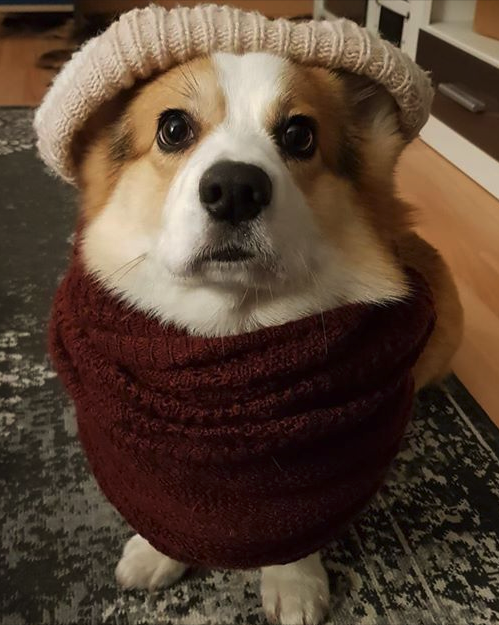

In [5]:
im

Let's break this image down into some colors.  I'll select:

1. White - [255,255,255]
2. Red - [255,0,0]
3. Blue - [0,0,255]
4. Black - [0,0,0]

In [6]:
new_im2, new_rgbs2 = convert_image_specific(im, 
                                            colors = [ [255, 255, 255], 
                                                      [255, 0, 0], 
                                                      [0,0,255], 
                                                      [0, 0, 0] ])

Let's take a look:

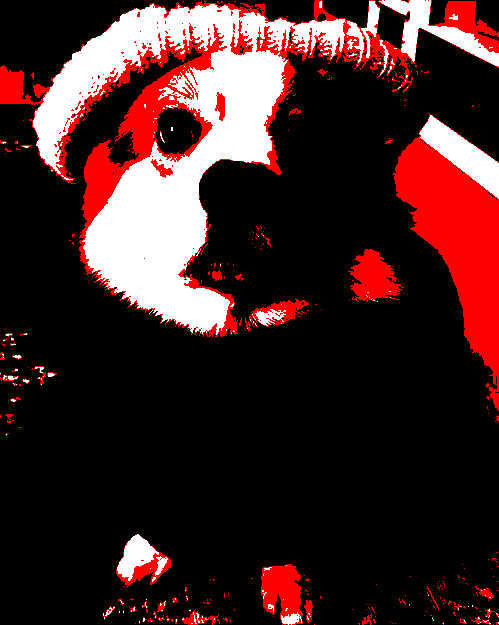

In [7]:
new_im2

This looks like only red/white/black really show up in this image which makes sense by looking at the original image.

You can also specify a number of colors to "downsample" your image to to its `ncolors` most frequent colors.  This can be useful for making histograms of color distributions.  

Convert to an 8-color image for easier handling:

In [8]:
new_im, new_rgbs = convert_image(im, ncolors = 4)

finding 4 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB (in no particular order):
(75, 57, 41)
(138, 109, 78)
(34, 16, 12)
(200, 183, 159)


Take a quick look:

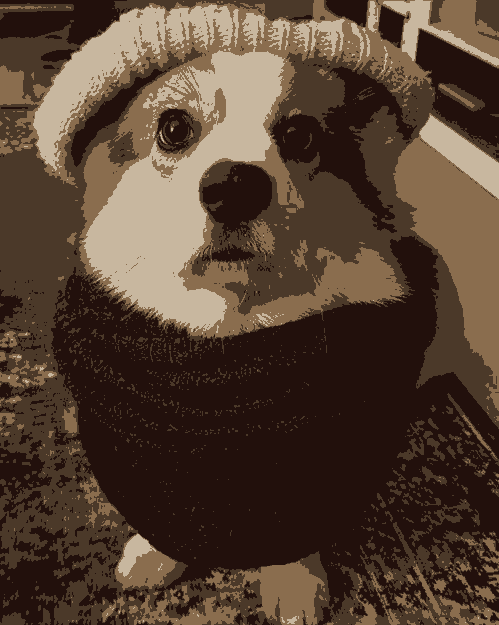

In [9]:
new_im

This make some intuative sense based on the original image -- there is a lot of red and brown in our original image so to see it represented with mostly reds and browns makes intuative sense.

In [10]:
data = np.array(new_im)

In [11]:
from image_manipulations import color_components

In [12]:
colors, color_labels, color_rgb_labels, npix_of_a_color = color_components(data)

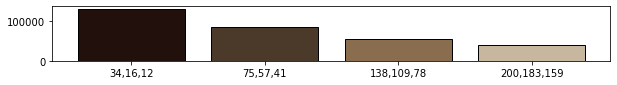

In [13]:
labels = color_rgb_labels
values = npix_of_a_color
colors = colors

# 2. Make the bar chart
fig, ax = plt.subplots(1,1, figsize=(10,1))
#ax.set_facecolor('gray')
myBarChart = ax.bar(labels, values) # SAVING what gets plotted on an axis as a variable

# 3. Update the colors of said bar chart
# so I can use myBarChart as a variable and update the colors
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black')
    
# 4. consistent
plt.show()

In [14]:
# pretend to read in a new image
im2 = Image.open(path_to_image)

In [16]:
new_im2, new_rgbs2 = convert_image(im2, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB (in no particular order):
(117, 90, 63)
(87, 69, 50)
(212, 198, 176)
(64, 47, 33)
(23, 8, 6)
(153, 121, 86)
(180, 158, 129)
(47, 25, 18)


In [18]:
data2 = np.array(new_im2)

In [19]:
colors2, color_labels2, color_rgb_labels2, npix_of_a_color2 = color_components(data2)

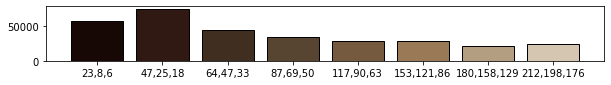

In [20]:
labels2 = color_rgb_labels2
values2 = npix_of_a_color2
colors2 = colors2

# 2. Make the bar chart
fig, ax = plt.subplots(1,1, figsize=(10,1))
#ax.set_facecolor('gray')
myBarChart = ax.bar(labels2, values2) # SAVING what gets plotted on an axis as a variable

# 3. Update the colors of said bar chart
# so I can use myBarChart as a variable and update the colors
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors2[i])
    myBarChart[i].set_edgecolor('black')
    
# 4. consistent
plt.show()

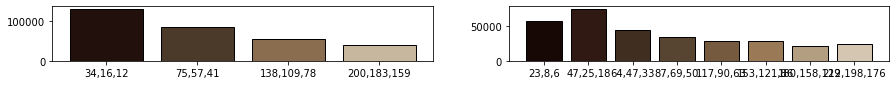

In [35]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,1))

# #1: First, plot our first histogram/bar chat to our first set of axis
myBarChart = ax[0].bar(labels, values) 

for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black')
    
    
# #2: my 8 channel plot
myBarChart2 = ax[1].bar(labels2, values2) 

for i in range(len(myBarChart2)):
    myBarChart2[i].set_color(colors2[i])
    myBarChart2[i].set_edgecolor('black')



# showing the whole plot last
plt.show()

In [32]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff09048ad50>,
      dtype=object)

In [33]:
ax[0]

In [34]:
ax[1]

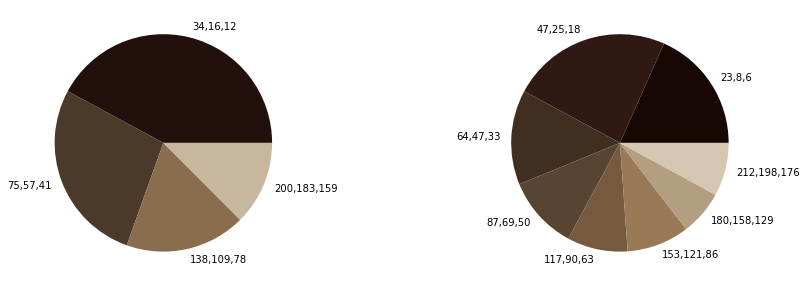

In [42]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# #1: First, plot our first histogram/bar chat to our first set of axis
myBarChart = ax[0].pie(values, labels=labels, colors=colors) 

#for i in range(len(myBarChart)):
#    myBarChart[i].set_color(colors[i])
#    myBarChart[i].set_edgecolor('black')
    
    
# #2: my 8 channel plot
myBarChart2 = ax[1].pie(values2, labels=labels2, colors=colors2) 

#for i in range(len(myBarChart2)):
#    myBarChart2[i].set_color(colors2[i])
#    myBarChart2[i].set_edgecolor('black')



# showing the whole plot last
plt.show()

In [37]:
ax[0].pie?

Object `pie` not found.


In [ ]:
ax[0].pie